In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn import linear_model

% matplotlib inline

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^RuntimeWarning: internal gelsd"
)

In [2]:
# read in data
file_path = 'table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xlsx'
df = pd.read_excel(file_path, header=4, skipfooter=3)

In [3]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN


In [4]:
# Make the column names tidier
df.columns = df.columns.str.replace('\n', '_').str.lower()
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '')
df.columns = df.columns.str.replace('-', '').str.replace(')', '')
print(df.columns)

Index(['city', 'population', 'violent_crime',
       'murder_and_nonnegligent_manslaughter', 'rape_revised_definition1',
       'rape_legacy_definition2', 'robbery', 'aggravated_assault',
       'property_crime', 'burglary', 'larceny_theft', 'motor_vehicle_theft',
       'arson3'],
      dtype='object')


In [5]:
df[df['city'] == 'New York']

,city,population,violent_crime,murder_and_nonnegligent_manslaughter,rape_revised_definition1,rape_legacy_definition2,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3
216,New York,8396126,52384,335,NaN,1112,19170,31767,141971,16606,117931,7434,NaN


In [6]:
df = df.drop(index=216)

In [7]:
features = ['population', 'murder_and_nonnegligent_manslaughter',
            'rape_legacy_definition2', 'robbery', 'aggravated_assault',
            'burglary', 'larceny_theft', 'motor_vehicle_theft']
target = ['property_crime']

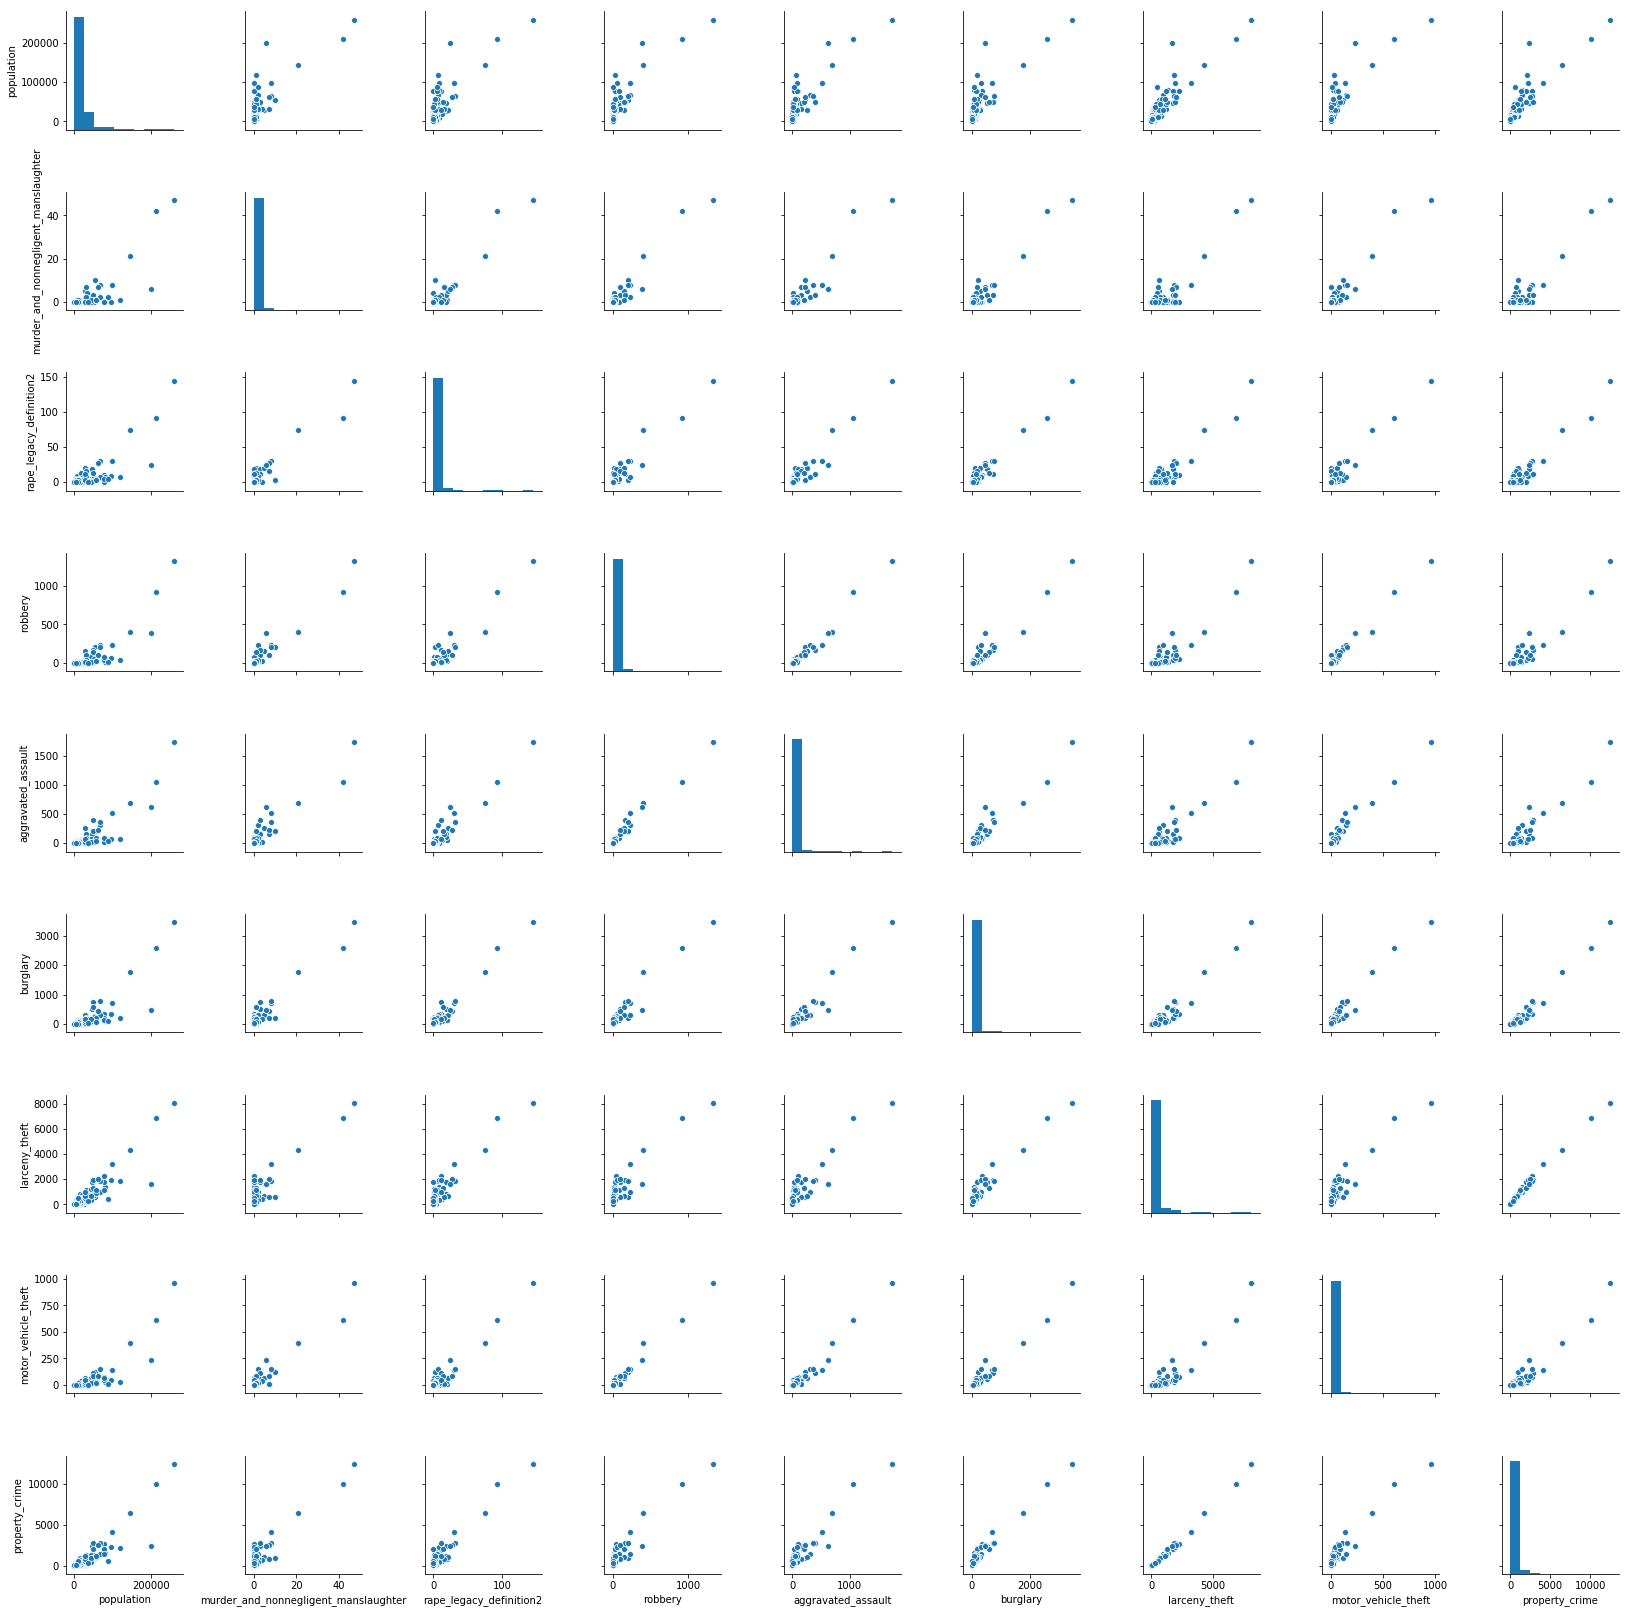

In [8]:
sns.pairplot(df[features + target])

Looks like they all correlate hightly together.

In [9]:
X = df[features]
y = df[target]
Sel = SelectKBest(f_regression, k=5)
model = Sel.fit_transform(X, y.values.ravel())
features_sel = Sel.get_support()

selected_features = []

for x in range(len(features_sel)):
    if features_sel[x] == True:
        selected_features.append(features[x])
        
print(selected_features)

['rape_legacy_definition2', 'aggravated_assault', 'burglary', 'larceny_theft', 'motor_vehicle_theft']


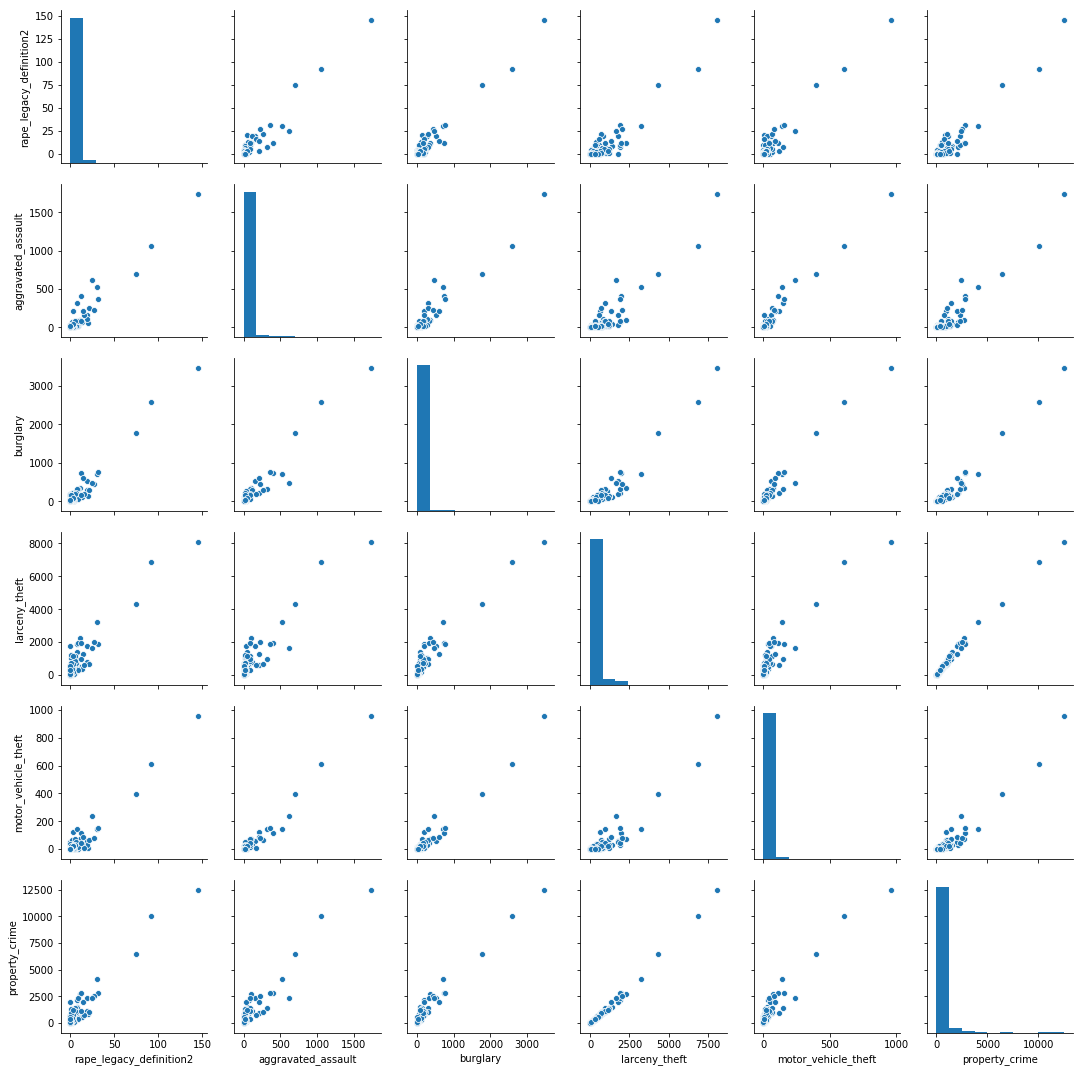

In [10]:
sns.pairplot(df[selected_features + target])

In [11]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df[target].values.reshape(-1, 1)
X = df[selected_features]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 6.32834805e-14 -3.09405015e-15  1.00000000e+00  1.00000000e+00
   1.00000000e+00]]

Intercept: 
 [-2.27373675e-13]

R-squared:
1.0


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [12]:
len(y)

347

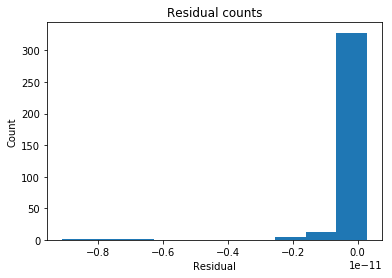

In [13]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df[target].values.ravel()

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

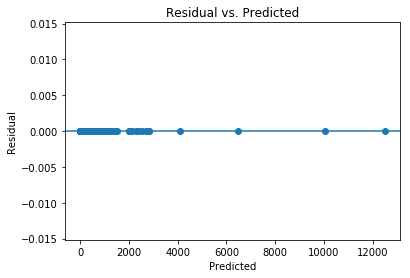

In [14]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()